<a href="https://colab.research.google.com/github/maximo261199/Practicas-de-Complejidad-Algoritmica/blob/main/factor_trafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install perlin-noise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import random

class Perlin:
    def __init__(self):
        self.gradients = []
        self.lowerBound = 0


    def valueAt(self, t):
        if(t<self.lowerBound):
            print("ERROR: Input parameter out of bounds!")
            return

        while t >= len(self.gradients)-1+self.lowerBound:
            self.gradients.append(random.uniform(-1, 1))

        discarded = int(self.lowerBound) 
        
        d1 = (t-t//1)
        d2 = d1-1
        a1 = self.gradients[(int)(t//1)-discarded]*d1
        a2 = self.gradients[(int)(t//1+1)-discarded]*d2

        amt = self.__ease(d1)

        return self.__lerp(a1,a2,amt)

    def discard(self, amount):
        gradientsToDiscard = int(amount+self.lowerBound%1)
        self.gradients = self.gradients[gradientsToDiscard:]
        self.lowerBound += amount

    def __ease(self, x):
        return 6*x**5-15*x**4+10*x**3


    def __lerp(self, start, stop, amt):
        return amt*(stop-start)+start

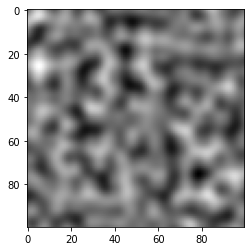

In [7]:
import random
from perlin_noise import PerlinNoise
import matplotlib.pyplot as plt

#noise = PerlinNoise(octaves=10, seed=random.randrange(1,1000000000000000))
noise = PerlinNoise(octaves=10, seed=2)
xpix, ypix = 100, 100
pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]

plt.imshow(pic, cmap='gray')
plt.show()

In [8]:
import random
import math

random.seed(0)

def generateWhiteNoise(width,height):
    noise = [[r for r in range(width)] for i in range(height)]

    for i in range(0,height):
        for j in range(0,width):
            noise[i][j] = random.randint(0,1)

    return noise

noise = generateWhiteNoise(50,12)

for i in noise:
    print()
    for o in i:
        if(o == 0):
            print('-',end='')
        else:
            print('#',end='')


##-######--#--#-#--##-###-###---#-##-#-----#--##-#
#-#-##-##-#----##------##--#####-#-##---#--#-##---
-------#-#------#---#-#---###--#--#-###-----##-#--
######--#-#-#--####-###---#---###-##--#-#-##--####
-#----###--------##--##--##-#-#--#----###-####--##
---####-#--#--###-#-#--#--#####--####-#-##-##--#--
----#--####-#-#-#-#-#---#--###------###--#-######-
--###--#-###-------#-##--###---#-####----###-#####
#----##--##-#--##-###--#----#-#-##--##-#-##---###-
##---##----##--##--#--#--###-###-#--#-##---#------
-##----#-###---######---#-#---#---###---#---###-##
#--##-##-###-###---#--##-##--##-##-#-#-##--#-#-##-